In [1]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# Statistical relation among data variables

## 1D

In [26]:
DATA_DIR_1D = './data/1D/generated_data'
DATA_DIR_2D = './data/2D/generated_data'

csv_list_1d = os.listdir(DATA_DIR_1D)
csv_list_2d = os.listdir(DATA_DIR_2D)

In [4]:
df_1 = pd.read_csv(os.path.join(DATA_DIR_1D, csv_list_1d[0]))
df_1.head()

,noisy motion,kalman prediction,ground truth,motion noise stdev,laser noise stdev,laser range 1,laser range 2,laser range 3,laser range 4,laser range 5,laser range 6
0,-1.318318,3.096904,1.624202,2,1,7.051450,7.037319,8.472150,6.775192,7.846658,6.212803
1,-0.480463,3.826736,2.217216,2,1,8.308921,8.711932,6.778785,8.511053,7.534894,8.828265
2,-0.584136,3.355685,2.564876,2,1,5.737654,6.021128,5.599779,7.122355,7.651191,5.981018
3,0.169337,4.322231,2.909266,2,1,6.755835,6.685338,6.994036,8.777191,6.804366,8.165234
4,0.140211,3.576836,2.876356,2,1,7.692994,7.478084,7.562940,6.230629,5.785327,5.860240


In [21]:
df_1.columns

Index(['noisy motion', 'kalman prediction', 'ground truth',
       'motion noise stdev', 'laser noise stdev', 'laser range 1',
       'laser range 2', 'laser range 3', 'laser range 4', 'laser range 5',
       'laser range 6'],
      dtype='object')

In [49]:
# find correlation among vars
corr = df_1.dropna().corr()
gt_corr_1 = corr['ground truth'].sort_values(ascending=False).to_dict()

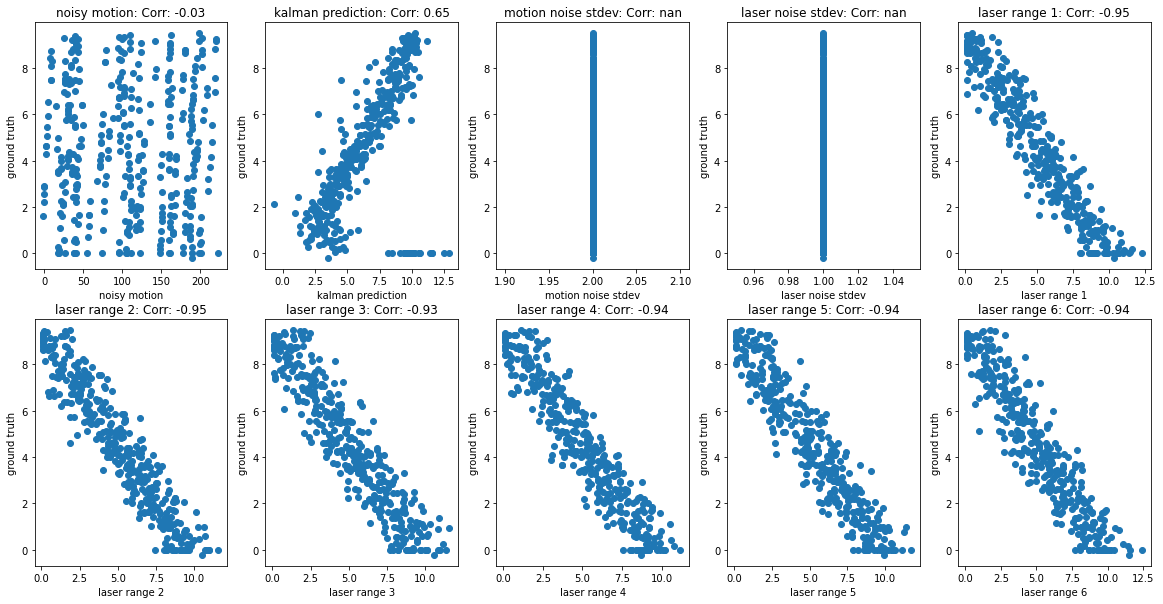

In [58]:
cols = ['noisy motion', 'kalman prediction', 'motion noise stdev', 'laser noise stdev', 'laser range 1',
       'laser range 2', 'laser range 3', 'laser range 4', 'laser range 5',
       'laser range 6']

# scatter plot of all vars with ground truth
plt.figure(figsize=(20,10))
for i in range(1, len(cols)+1):
    # print(df_1.columns[i-1])
    # if df_1.columns[i-1] == 'ground truth':
    #     continue
    plt.subplot(2,5,i)
    plt.scatter(df_1[cols[i-1]], df_1['ground truth'])
    plt.xlabel(cols[i-1])
    plt.ylabel('ground truth')
    # add correlation legend
    # plt.text(0.9, 1, 'corr: {:.2f}'.format(gt_corr_1[cols[i-1]]), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title(f'{cols[i-1]}: Corr: {gt_corr_1[cols[i-1]]:.2f}')

plt.show()

## 2D

In [69]:
df_2 = pd.read_csv(os.path.join(DATA_DIR_2D, csv_list_2d[-1]))
df_2.head()

,noisy_motion_x,noisy_motion_y,noisy_motion_theta,noisy_motion_cov_xx,noisy_motion_cov_xy,noisy_motion_cov_xtheta,noisy_motion_cov_yy,noisy_motion_cov_ytheta,noisy_motion_cov_thetatheta,kalman_prediction_x,...,lidar_cov_xx,lidar_cov_xy,lidar_cov_xtheta,lidar_cov_yy,lidar_cov_ytheta,lidar_cov_thetatheta,ground_truth_x,ground_truth_y,ground_truth_theta,alpha
0,-1.836162e-06,0.000011,0.000085,8.273241e-12,-4.986194e-11,-3.843438e-10,3.005126e-10,2.316399e-09,1.785517e-08,-0.000046,...,0.000002,3.603949e-07,0.0,0.000004,0.0,3.683649e-08,-0.000089,-0.000089,0.003760,8
1,8.146158e-07,-0.000005,-0.000038,8.284437e-12,-4.990645e-11,-3.846952e-10,3.006426e-10,2.317451e-09,1.786367e-08,-0.000046,...,0.000002,4.694778e-07,0.0,0.000004,0.0,4.347377e-08,-0.000089,-0.000089,0.003794,8
2,2.668217e-07,-0.000002,-0.000012,8.295645e-12,-4.995101e-11,-3.850469e-10,3.007726e-10,2.318503e-09,1.787217e-08,-0.000046,...,0.000002,2.216968e-07,0.0,0.000004,0.0,3.833651e-08,-0.000090,-0.000090,0.003827,8
3,-4.128545e-06,0.000025,0.000192,8.306869e-12,-4.999559e-11,-3.853990e-10,3.009027e-10,2.319556e-09,1.788067e-08,-0.000051,...,0.000002,3.671549e-07,0.0,0.000003,0.0,3.762879e-08,-0.000091,-0.000091,0.003861,8
4,2.913300e-06,-0.000018,-0.000135,8.318107e-12,-5.004022e-11,-3.857513e-10,3.010328e-10,2.320610e-09,1.788918e-08,-0.000051,...,0.000002,2.164658e-07,0.0,0.000004,0.0,4.273847e-08,-0.000092,-0.000092,0.003894,8


In [70]:
cols_2 = [i for i in df_2.columns if 'ground_truth' not in i]
len(cols_2), cols_2

(22,
 ['noisy_motion_x',
  'noisy_motion_y',
  'noisy_motion_theta',
  'noisy_motion_cov_xx',
  'noisy_motion_cov_xy',
  'noisy_motion_cov_xtheta',
  'noisy_motion_cov_yy',
  'noisy_motion_cov_ytheta',
  'noisy_motion_cov_thetatheta',
  'kalman_prediction_x',
  'kalman_prediction_y',
  'kalman_prediction_theta',
  'lidar_x',
  'lidar_y',
  'lidar_theta',
  'lidar_cov_xx',
  'lidar_cov_xy',
  'lidar_cov_xtheta',
  'lidar_cov_yy',
  'lidar_cov_ytheta',
  'lidar_cov_thetatheta',
  'alpha'])

In [71]:
# find correlation among vars
corr_2 = df_2.dropna().corr()

gt_corr_x_2 = corr_2['ground_truth_x'].sort_values(ascending=False).to_dict()

gt_corr_y_2 = corr_2['ground_truth_y'].sort_values(ascending=False).to_dict()

gt_corr_theta_2 = corr_2['ground_truth_theta'].sort_values(ascending=False).to_dict()

### vs GT X

noisy_motion_x
noisy_motion_y
noisy_motion_theta
noisy_motion_cov_xx
noisy_motion_cov_xy
noisy_motion_cov_xtheta
noisy_motion_cov_yy
noisy_motion_cov_ytheta
noisy_motion_cov_thetatheta
kalman_prediction_x
kalman_prediction_y
kalman_prediction_theta
lidar_x
lidar_y
lidar_theta
lidar_cov_xx
lidar_cov_xy
lidar_cov_xtheta
lidar_cov_yy
lidar_cov_ytheta
lidar_cov_thetatheta
ground_truth_x


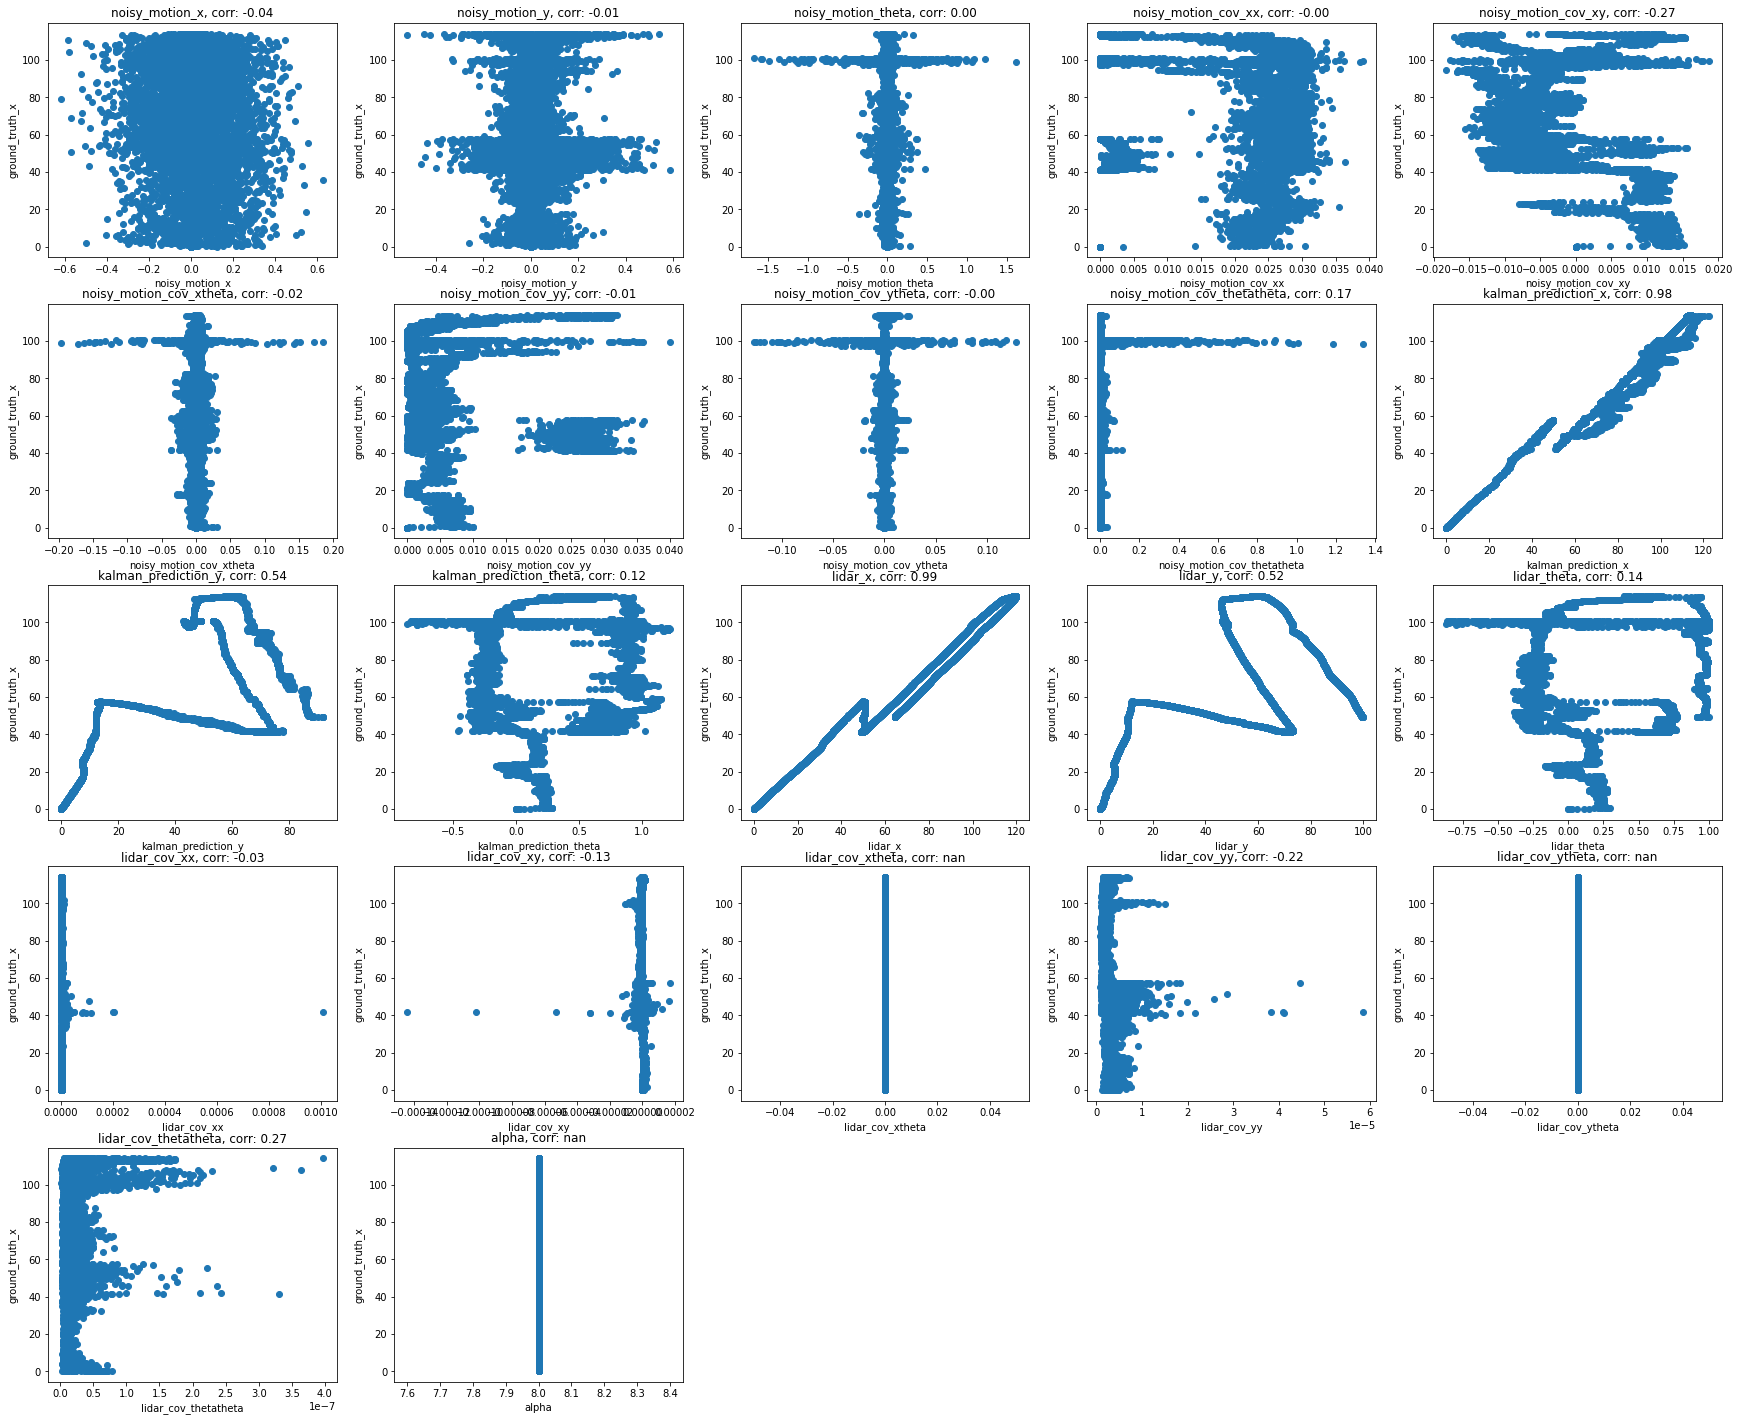

In [72]:
# cols = df_2.columns

# scatter plot of all vars with ground truth
plt.figure(figsize=(30,25))
for i in range(1, len(cols_2)+1):
    print(df_2.columns[i-1])
    # if df_2.columns[i-1] == 'ground truth':
    #     continue
    plt.subplot(5,5,i)
    plt.scatter(df_2[cols_2[i-1]], df_2['ground_truth_x'])
    plt.xlabel(cols_2[i-1])
    plt.ylabel('ground_truth_x')
    plt.title(f'{cols_2[i-1]}, corr: {gt_corr_x_2[cols_2[i-1]]:.2f}')

plt.show()

### Vs GT Y

noisy_motion_x
noisy_motion_y
noisy_motion_theta
noisy_motion_cov_xx
noisy_motion_cov_xy
noisy_motion_cov_xtheta
noisy_motion_cov_yy
noisy_motion_cov_ytheta
noisy_motion_cov_thetatheta
kalman_prediction_x
kalman_prediction_y
kalman_prediction_theta
lidar_x
lidar_y
lidar_theta
lidar_cov_xx
lidar_cov_xy
lidar_cov_xtheta
lidar_cov_yy
lidar_cov_ytheta
lidar_cov_thetatheta
ground_truth_x


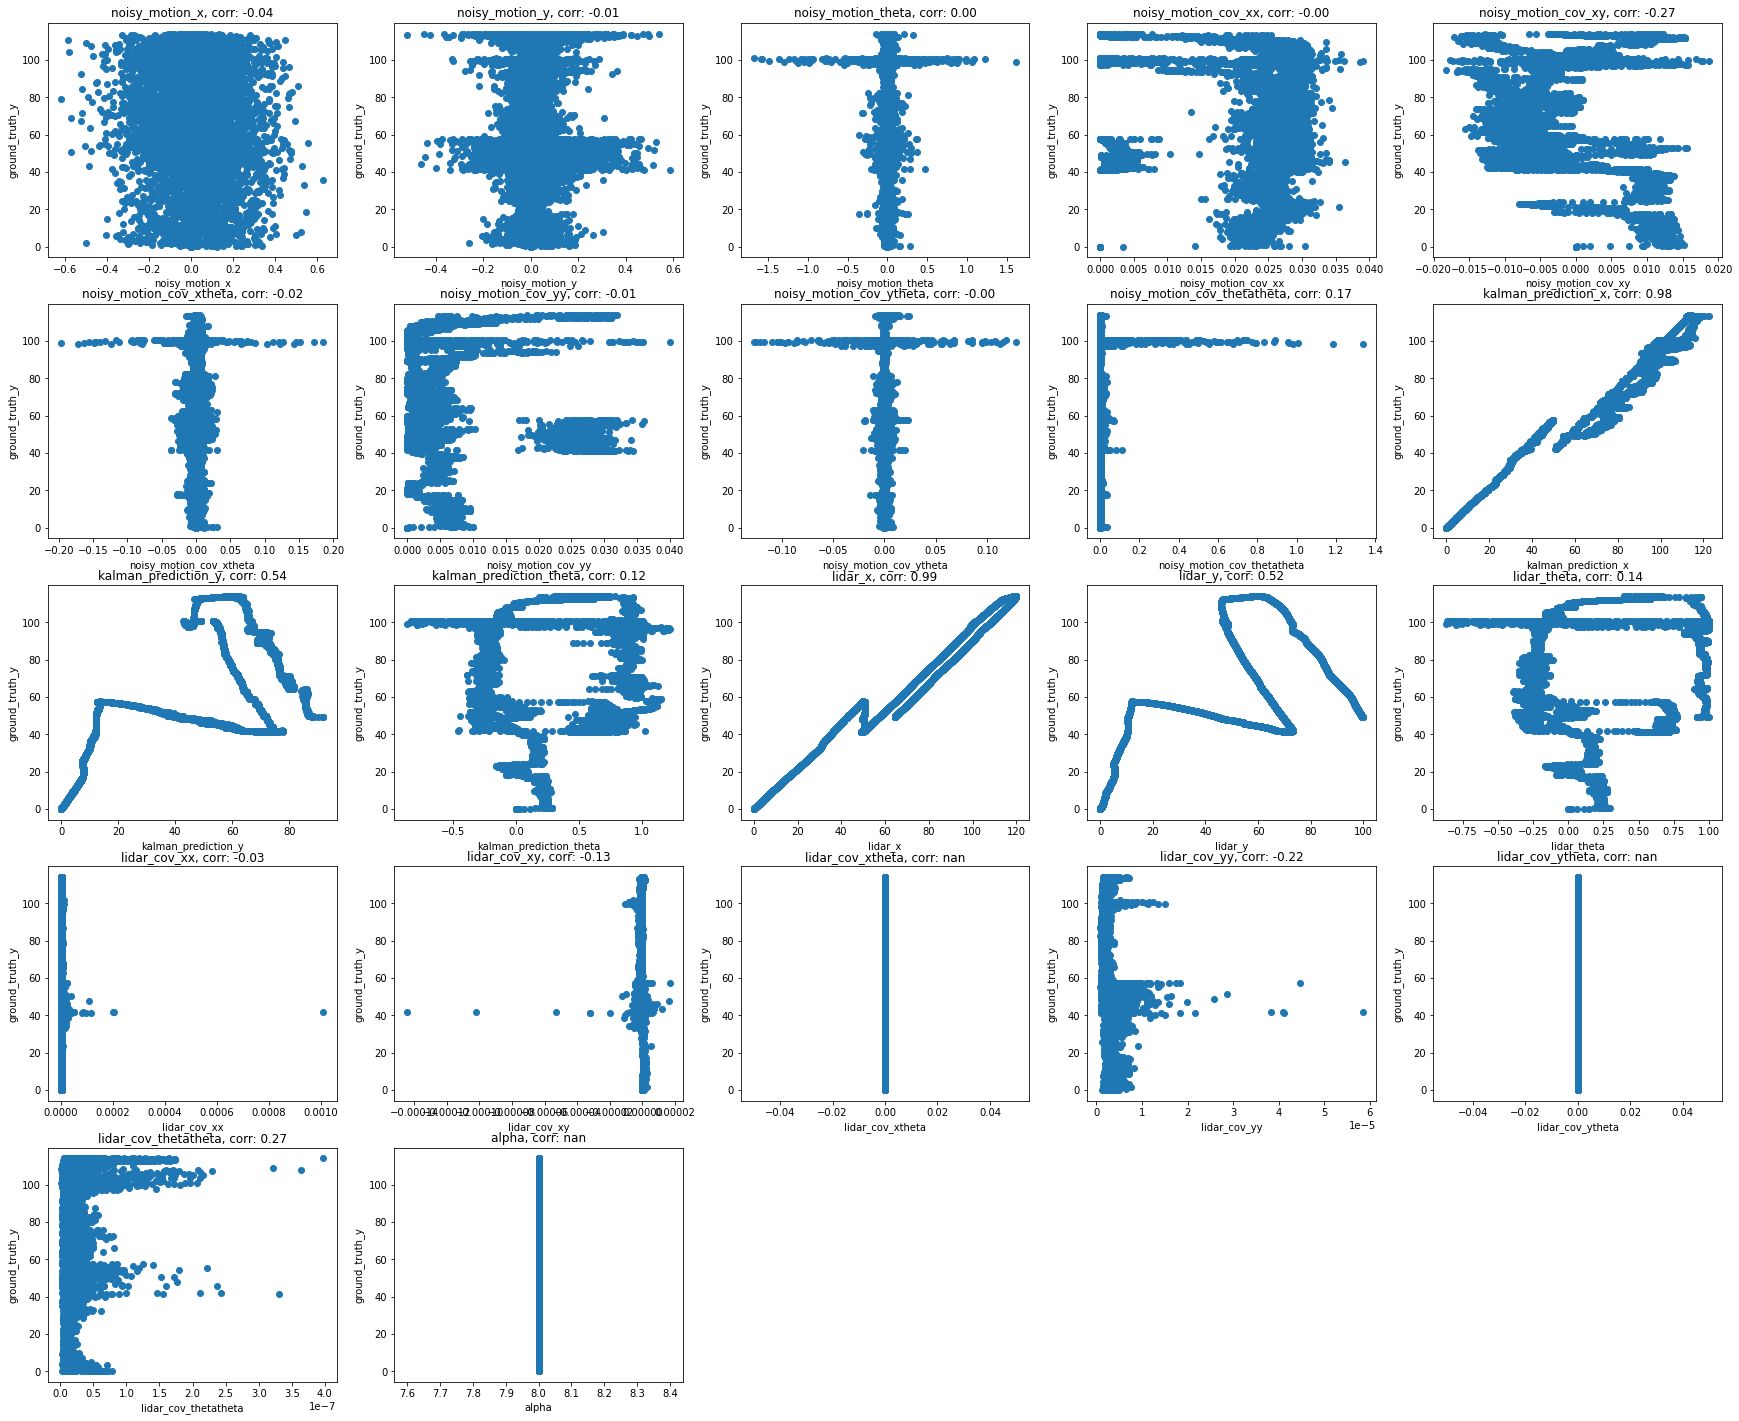

In [73]:
# cols = df_2.columns

# scatter plot of all vars with ground truth
plt.figure(figsize=(30,25))
for i in range(1, len(cols_2)+1):
    print(df_2.columns[i-1])
    # if df_2.columns[i-1] == 'ground truth':
    #     continue
    plt.subplot(5,5,i)
    plt.scatter(df_2[cols_2[i-1]], df_2['ground_truth_y'])
    plt.xlabel(cols_2[i-1])
    plt.ylabel('ground_truth_y')
    plt.title(f'{cols_2[i-1]}, corr: {gt_corr_y_2[cols_2[i-1]]:.2f}')
plt.show()

### Vs GT theta

noisy_motion_x
noisy_motion_y
noisy_motion_theta
noisy_motion_cov_xx
noisy_motion_cov_xy
noisy_motion_cov_xtheta
noisy_motion_cov_yy
noisy_motion_cov_ytheta
noisy_motion_cov_thetatheta
kalman_prediction_x
kalman_prediction_y
kalman_prediction_theta
lidar_x
lidar_y
lidar_theta
lidar_cov_xx
lidar_cov_xy
lidar_cov_xtheta
lidar_cov_yy
lidar_cov_ytheta
lidar_cov_thetatheta
ground_truth_x


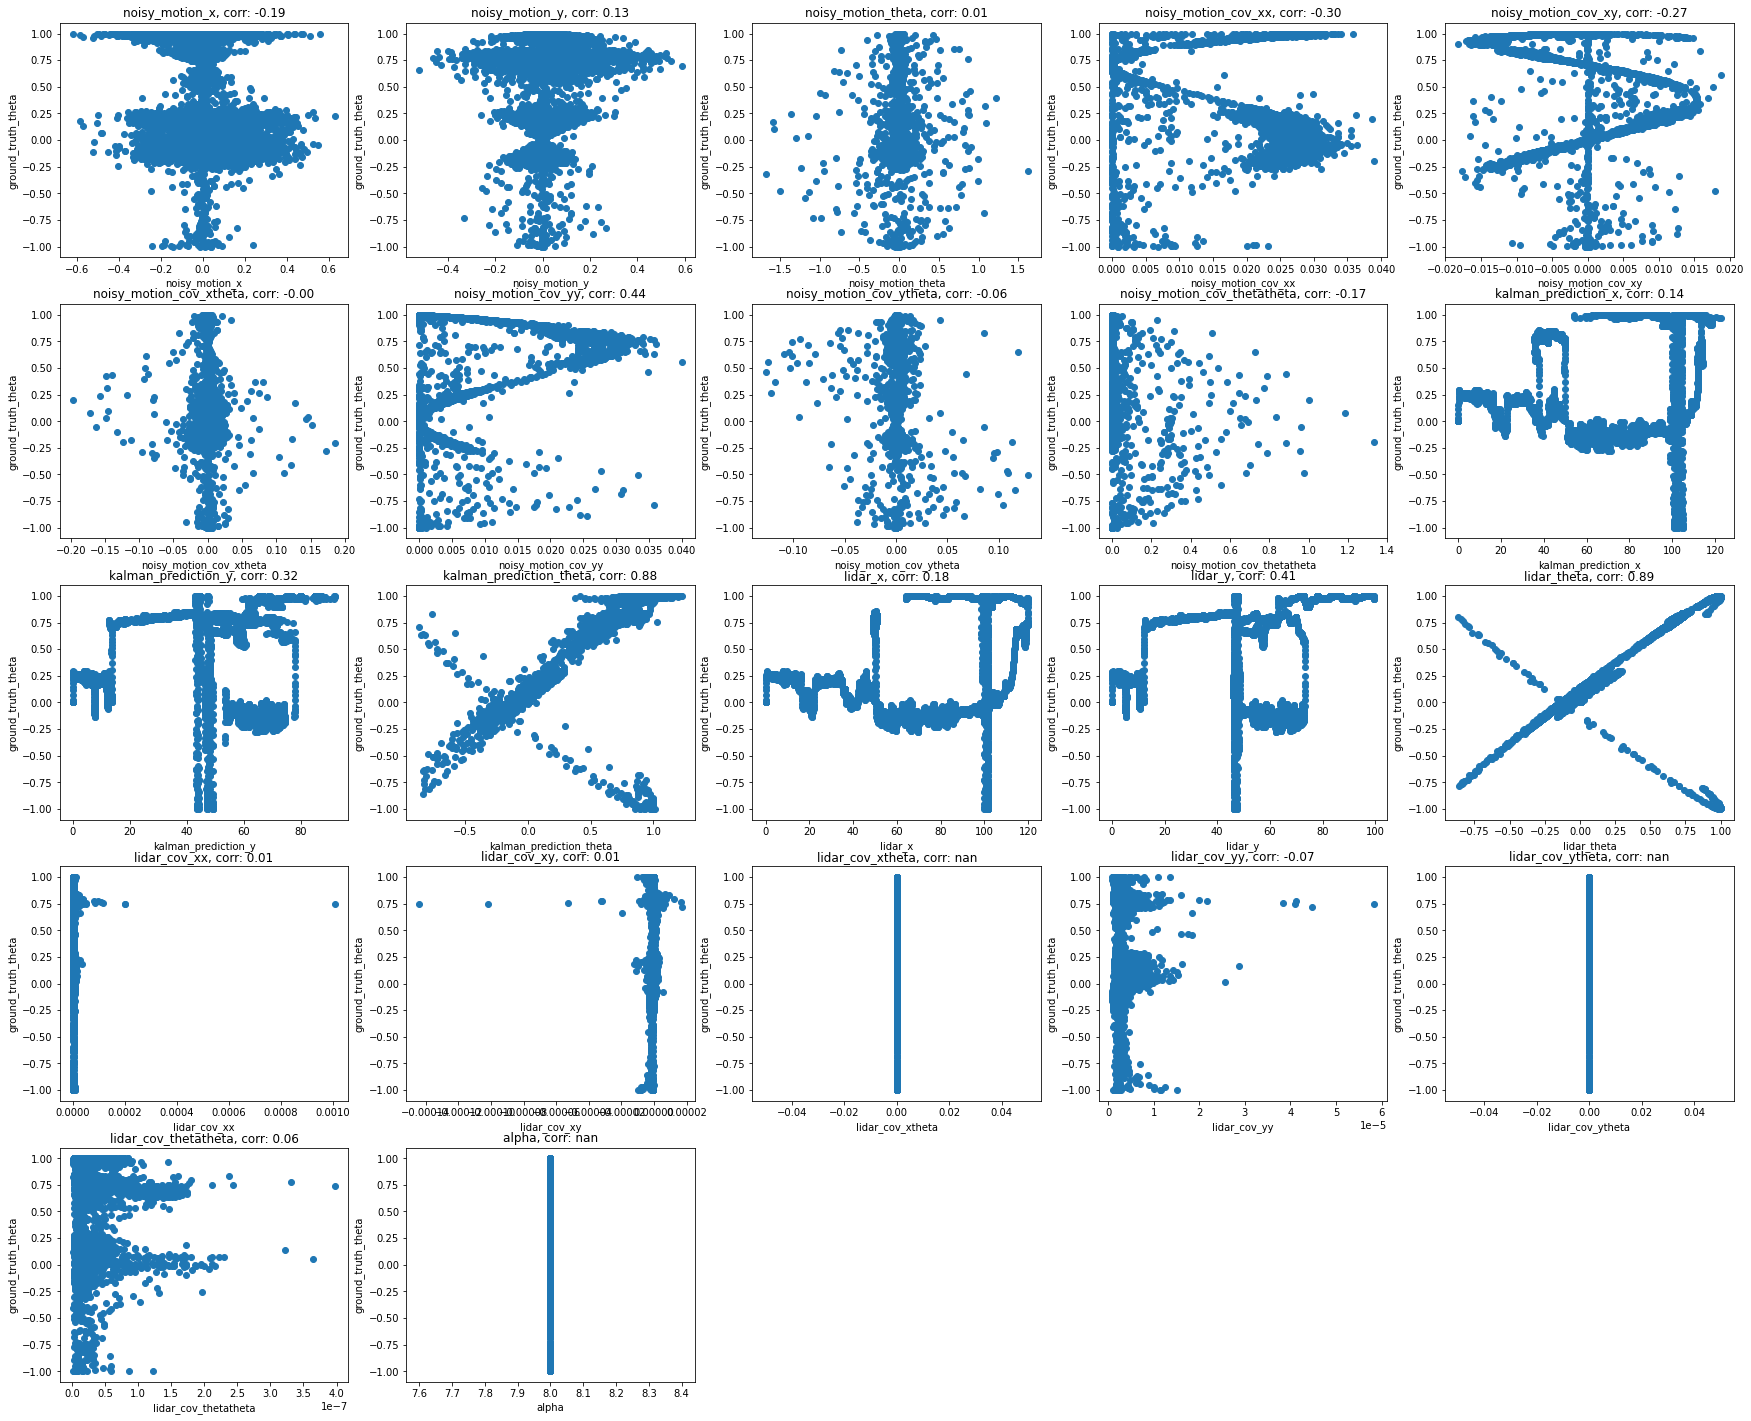

In [74]:
# cols = df_2.columns

# scatter plot of all vars with ground truth
plt.figure(figsize=(30,25))
for i in range(1, len(cols_2)+1):
    print(df_2.columns[i-1])
    # if df_2.columns[i-1] == 'ground truth':
    #     continue
    plt.subplot(5,5,i)
    plt.scatter(df_2[cols_2[i-1]], df_2['ground_truth_theta'])
    plt.xlabel(cols_2[i-1])
    plt.ylabel('ground_truth_theta')
    # plt.title(cols_2[i-1])
    plt.title(f'{cols_2[i-1]}, corr: {gt_corr_theta_2[cols_2[i-1]]:.2f}')


plt.show()

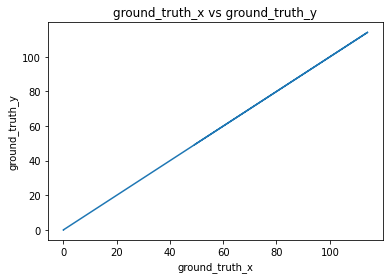

In [79]:
plt.plot(df_2['ground_truth_x'], df_2['ground_truth_y'])
plt.xlabel('ground_truth_x')
plt.ylabel('ground_truth_y')
plt.title('ground_truth_x vs ground_truth_y')
plt.show()

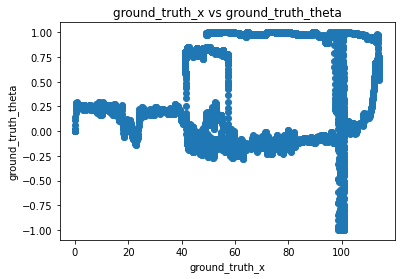

In [77]:
plt.scatter(df_2['ground_truth_x'], df_2['ground_truth_theta'])
plt.xlabel('ground_truth_x')
plt.ylabel('ground_truth_theta')
plt.title('ground_truth_x vs ground_truth_theta')
plt.show()

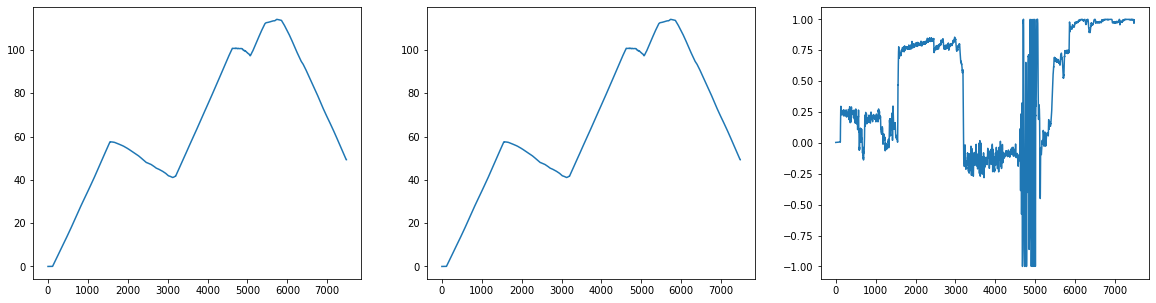

In [81]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(range(len(df_2)), df_2['ground_truth_x'])
plt.subplot(1,3,2)
plt.plot(range(len(df_2)), df_2['ground_truth_y'])
plt.subplot(1,3,3)
plt.plot(range(len(df_2)), df_2['ground_truth_theta'])
# plt.xlabel('ground_truth_x')
# plt.ylabel('ground_truth_theta')
# plt.title('ground_truth_x vs ground_truth_theta')
plt.show()

## Robo Trajectory/Path